In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
!pip install wandb

In [3]:
import wandb
wandb.login()

wandb: Currently logged in as: himirdesai72 (himir-desai). Use `wandb login --relogin` to force relogin


True

In [36]:
epochs = 2
lrate = 0.003

In [37]:
run = wandb.init(
    # Set the project where this run will be logged
    project="CIFAR10",
    # Track hyperparameters and run metadata
    config={
        "learning_rate": lrate,
        "epochs": epochs,
    })

learning rate,████████████████████▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,█▇▆▅▅▅▅▄▄▄▄▄▄▃▄▄▄▃▃▃▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁
learning rate,0.00075
loss,469.36813


In [38]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)


classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [39]:
import matplotlib.pyplot as plt
import numpy as np

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

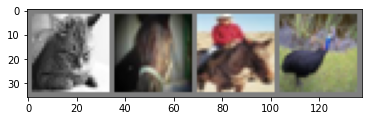

cat   horse horse bird 


In [40]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# # show images
imshow(torchvision.utils.make_grid(images))
# # print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [41]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 64, 5)
        self.fc1 = nn.Linear(64 * 5 * 5, 240)
        self.fc2 = nn.Linear(240, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [42]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lrate, momentum=0.9)

In [ ]:
n_epoch = 0
for epoch in range(epochs):  # loop over the dataset multiple times
    n_epoch+=1
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 500:.3f} {lrate}')
            wandb.log({"loss": running_loss, "learning rate": lrate})
            running_loss = 0.0
            if n_epoch == 2:
                lrate/=1.05
                for g in optimizer.param_groups:
                    g['lr'] = lrate
    lrate/=4
    for g in optimizer.param_groups:
        g['lr'] = lrate
print('Finished Training')

[1,   500] loss: 2.252 0.003
[1,  1000] loss: 2.035 0.003
[1,  1500] loss: 1.873 0.003
[1,  2000] loss: 1.772 0.003
[1,  2500] loss: 1.699 0.003
[1,  3000] loss: 1.655 0.003
[1,  3500] loss: 1.597 0.003
[1,  4000] loss: 1.605 0.003
[1,  4500] loss: 1.584 0.003
[1,  5000] loss: 1.530 0.003
[1,  5500] loss: 1.512 0.003
[1,  6000] loss: 1.444 0.003
[1,  6500] loss: 1.431 0.003
[1,  7000] loss: 1.438 0.003
[1,  7500] loss: 1.387 0.003
[1,  8000] loss: 1.429 0.003
[1,  8500] loss: 1.365 0.003
[1,  9000] loss: 1.382 0.003
[1,  9500] loss: 1.351 0.003
[1, 10000] loss: 1.366 0.003
[1, 10500] loss: 1.305 0.003
[1, 11000] loss: 1.288 0.003
[1, 11500] loss: 1.304 0.003
[1, 12000] loss: 1.265 0.003
[1, 12500] loss: 1.280 0.003
[2,   500] loss: 1.062 0.00075
[2,  1000] loss: 1.015 0.0007142857142857143
[2,  1500] loss: 1.001 0.0006802721088435374
[2,  2000] loss: 1.016 0.000647878198898607
[2,  2500] loss: 1.008 0.0006170268560939114
[2,  3000] loss: 0.989 0.0005876446248513442
[2,  3500] loss: 0.9

In [12]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

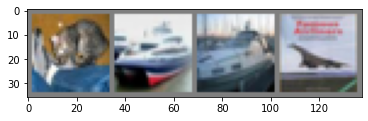

GroundTruth:  cat   ship  ship  plane


In [13]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [14]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [15]:
outputs = net(images)

In [16]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  ship 


In [17]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 66 %


In [18]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 75.2 %
Accuracy for class: car   is 79.0 %
Accuracy for class: bird  is 56.5 %
Accuracy for class: cat   is 55.8 %
Accuracy for class: deer  is 57.2 %
Accuracy for class: dog   is 48.6 %
Accuracy for class: frog  is 81.9 %
Accuracy for class: horse is 69.1 %
Accuracy for class: ship  is 78.2 %
Accuracy for class: truck is 62.8 %
